Import and load data


In [28]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Prepare data 

In [29]:
import numpy as np
 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
 

def one_hot_encode_labels(labels):
    unique_labels = set(labels)
    encoded_labels = []
    for label in labels:
        encoded_label = np.zeros(len(unique_labels))
        encoded_label[label-1] = 1
        encoded_labels.append(encoded_label)
    return np.asarray(encoded_labels)

vectorized_train_data = vectorize_sequences(train_data)
vectorized_test_data = vectorize_sequences(test_data)

encoded_train_labels = one_hot_encode_labels(train_labels)
encoded_test_labels = one_hot_encode_labels(test_labels)

Prepare network architecture

In [30]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Divide dataset


In [31]:
(x_validation, x_train) = np.split(vectorized_train_data, [1000])
(y_validation, y_train) = np.split(encoded_train_labels, [1000])

Train the network


In [32]:
history = network.fit(x_train, y_train, 
            epochs=20, 
            batch_size=512, 
            validation_data=(x_validation, y_validation)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 126us/step - loss: 2.6620 - accuracy: 0.5132 - val_loss: 1.7488 - val_accuracy: 0.6450
Epoch 2/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.4248 - accuracy: 0.7100 - val_loss: 1.3100 - val_accuracy: 0.7240
Epoch 3/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.0531 - accuracy: 0.7813 - val_loss: 1.1389 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.8222 - accuracy: 0.8275 - val_loss: 1.0442 - val_accuracy: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.6478 - accuracy: 0.8638 - val_loss: 0.9812 - val_accuracy: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.5155 - accuracy: 0.8913 - val_loss: 0.9221 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.40

Display loss and accuracy


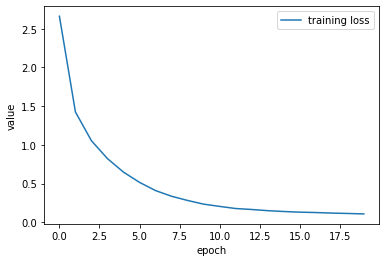

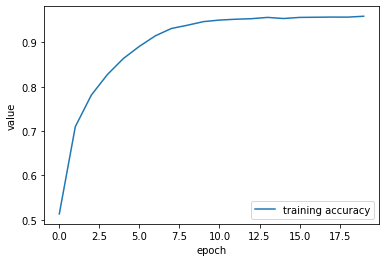

In [33]:
%matplotlib inline 
from matplotlib import pyplot as plt

def display_plots(training_history): 
    history_dict = training_history.history    
    
    training_loss = history_dict['loss']
    plt.plot(range(len(training_loss)), training_loss, label='training loss')
    plt.xlabel('epoch')
    plt.ylabel('value')
    plt.legend()
    plt.show()
    
    training_acc = history_dict['accuracy']
    plt.plot(range(len(training_acc)), training_acc, label='training accuracy')
    plt.xlabel('epoch')
    plt.ylabel('value')
    plt.legend()
    plt.show()

display_plots(history)

Around 8th/11th epoch accuracy seems to nearly achieve maximum, and it stops changing significantly, which means that it stops learning


Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 136us/step - loss: 2.7172 - accuracy: 0.5014 - val_loss: 1.8124 - val_accuracy: 0.6660
Epoch 2/8
7982/7982 [==============================] - 1s 116us/step - loss: 1.4526 - accuracy: 0.7066 - val_loss: 1.3311 - val_accuracy: 0.7160
Epoch 3/8
7982/7982 [==============================] - 1s 119us/step - loss: 1.0586 - accuracy: 0.7710 - val_loss: 1.1403 - val_accuracy: 0.7530
Epoch 4/8
7982/7982 [==============================] - 1s 127us/step - loss: 0.8338 - accuracy: 0.8230 - val_loss: 1.0293 - val_accuracy: 0.7840
Epoch 5/8
7982/7982 [==============================] - 1s 119us/step - loss: 0.6638 - accuracy: 0.8643 - val_loss: 0.9971 - val_accuracy: 0.7810
Epoch 6/8
7982/7982 [==============================] - 1s 121us/step - loss: 0.5308 - accuracy: 0.8910 - val_loss: 0.9224 - val_accuracy: 0.8100
Epoch 7/8
7982/7982 [==============================] - 1s 124us/step - loss: 0.429

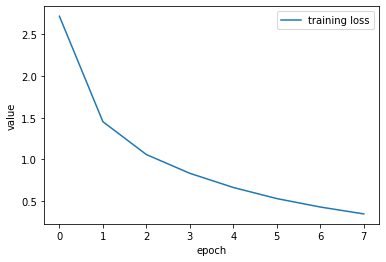

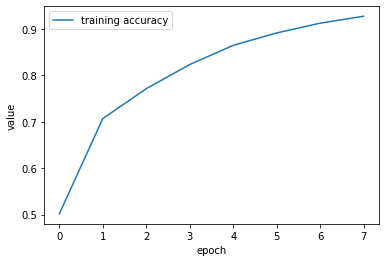

In [35]:
network = models.Sequential()
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(x_train, y_train, 
            epochs=8, 
            batch_size=512, 
            validation_data=(x_validation, y_validation)
)
display_plots(history)




Accuracy of a network train only for 8 epochs is on very similar level as it was after training for 20 epochs


Train on 7982 samples, validate on 1000 samples
Epoch 1/250
7982/7982 [==============================] - 1s 118us/step - loss: 3.8095 - accuracy: 0.0915 - val_loss: 3.7870 - val_accuracy: 0.0660
Epoch 2/250
7982/7982 [==============================] - 1s 99us/step - loss: 3.7581 - accuracy: 0.1632 - val_loss: 3.7381 - val_accuracy: 0.0840
Epoch 3/250
7982/7982 [==============================] - 1s 102us/step - loss: 3.6899 - accuracy: 0.0786 - val_loss: 3.6672 - val_accuracy: 0.0700
Epoch 4/250
7982/7982 [==============================] - 1s 84us/step - loss: 3.6001 - accuracy: 0.0759 - val_loss: 3.5832 - val_accuracy: 0.0590
Epoch 5/250
7982/7982 [==============================] - 1s 92us/step - loss: 3.4937 - accuracy: 0.0702 - val_loss: 3.4769 - val_accuracy: 0.0590
Epoch 6/250
7982/7982 [==============================] - 1s 92us/step - loss: 3.3631 - accuracy: 0.0737 - val_loss: 3.3495 - val_accuracy: 0.0640
Epoch 7/250
7982/7982 [==============================] - 1s 95us/step - lo

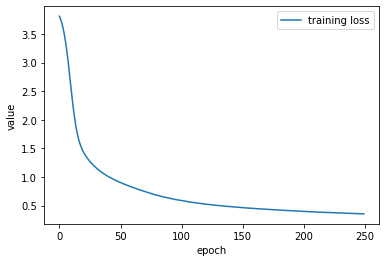

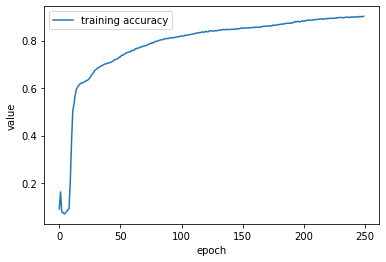

In [39]:
network = models.Sequential()
network.add(layers.Dense(4, activation='relu'))
network.add(layers.Dense(4, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(x_train, y_train, 
            epochs=250, 
            batch_size=512, 
            validation_data=(x_validation, y_validation)
)
display_plots(history)

Network with only 4-dimentional intermediate layers needs significantly more epochs to achieve similar results to the one with 64 but
its possible to train such network in this way.